In [2]:
!pip install -q langchain==0.0.219 openai==0.27.8

# !pip install -q transformers==4.29.2 sentencepiece==0.1.99 accelerate==0.19.0 bitsandbytes==0.39.0

!pip install -q python-dotenv==1.0.0

!pip install -q pandas==1.5.3
!pip install -q unstructured==0.7.12
!pip install -q wikipedia==1.4.0
!pip install -q pypdf==3.12.0
!pip install -q jq==1.4.1
!pip install -q nltk==3.8.1
!pip install -q tiktoken==0.4.0
!pip install -q transformers==4.29.2 sentencepiece==0.1.99
!pip install -q sentence-transformers==2.2.2
!pip install -q cohere==4.11.2
!pip install -q faiss-cpu==1.7.4
!pip install -q chromadb==0.3.26

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 31.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 1.5.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.8/420.8 kB 15.0 MB/s eta 0:

## OpenAI

In [ ]:
from dotenv import dotenv_values
env_values = dotenv_values("./app.env")
openai_api_key = env_values['OPENAI_API_KEY']

In [ ]:
from langchain.llms import OpenAI

llm = OpenAI(openai_api_key=openai_api_key,
             model_name="text-davinci-003",
             temperature=0.5)

## Documents
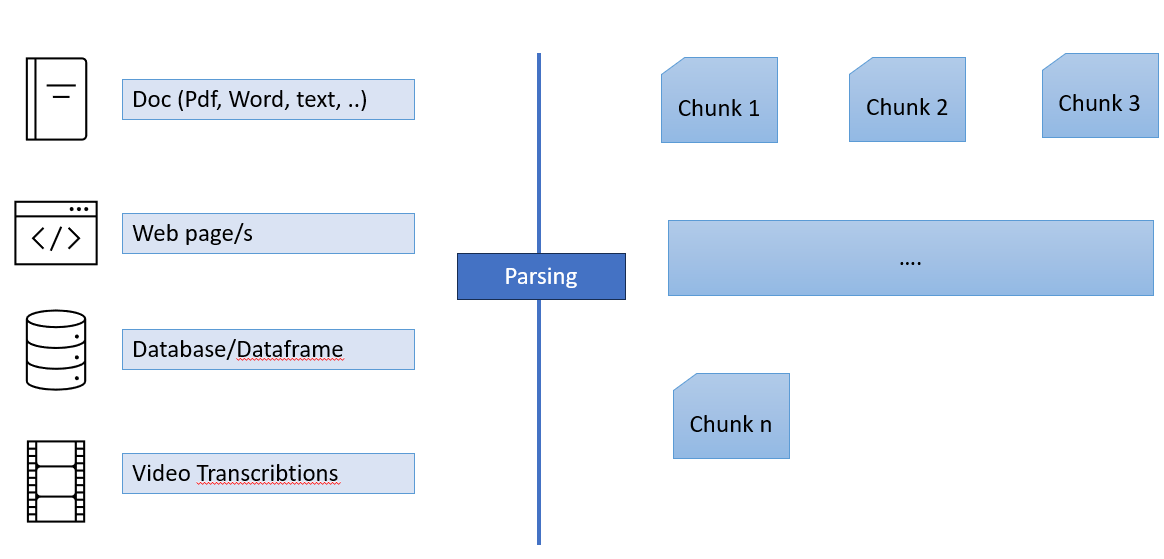

### Loaders | Pandas

In [ ]:
!wget -O youtube-sub.csv https://raw.githubusercontent.com/Petlja/JupyterBookSrCyr/master/podaci/Top%2025%20YouTubers.csv

In [ ]:
import pandas as pd
from langchain.document_loaders import DataFrameLoader

In [ ]:
dataframe = pd.read_csv("./youtube-sub.csv", sep=",")
dataframe.head()

,RANK,GRADE,NAME,VIDEOS,SUBSCRIBERS,VIEWES
0,1,A++,T-Series,13629,105783888,76945588449
1,2,A,PewDiePie,3898,97853589,22298927681
2,3,A+,5-Minute Crafts,3341,58629572,14860695079
3,4,A++,Cocomelon - Nursery Rhymes,441,53163816,33519273951
4,5,A++,SET India,31923,51784081,36464793233


In [ ]:
dataframe = dataframe[ ["NAME", "VIDEOS", "SUBSCRIBERS", "VIEWES"] ]
dataframe.head()

,NAME,VIDEOS,SUBSCRIBERS,VIEWES
0,T-Series,13629,105783888,76945588449
1,PewDiePie,3898,97853589,22298927681
2,5-Minute Crafts,3341,58629572,14860695079
3,Cocomelon - Nursery Rhymes,441,53163816,33519273951
4,SET India,31923,51784081,36464793233


In [ ]:
llm_loader = DataFrameLoader(dataframe, page_content_column="NAME")

In [ ]:
llm_data = llm_loader.load()

In [ ]:
llm_data[5].dict()

{'page_content': 'Canal KondZilla',
 'metadata': {'VIDEOS': 1100, 'SUBSCRIBERS': 50560964, 'VIEWES': 25446405744}}

### Loaders | URLs

In [ ]:
from langchain.document_loaders import UnstructuredURLLoader

urls = [
    "https://www.apple.com/in/support/products/faqs.html",
    "https://www.apple.com/legal/sales-support/",
]

In [ ]:
llm_loader = UnstructuredURLLoader(urls=urls)
llm_data = llm_loader.load()

In [ ]:
llm_data[0]

### Loaders | WikiPedia

In [ ]:
from langchain.document_loaders import WikipediaLoader

query = "Nikola Tesla"

llm_data = WikipediaLoader(query=query,
                           load_max_docs=3,
                           doc_content_chars_max=20_000).load()


In [ ]:
llm_data[0].page_content

In [ ]:
llm_data[0].metadata

### Loaders | PDF

##### Check: https://python.langchain.com/docs/modules/data_connection/document_loaders/how_to/pdf


In [ ]:
!wget -O laravel.pdf https://laraveldaily.com/wp-content/uploads/2020/04/laravel-tips-2020-04.pdf

In [ ]:
from langchain.document_loaders import PyPDFLoader

In [ ]:
llm_loader = PyPDFLoader("./laravel.pdf")
pages = llm_loader.load_and_split()

In [ ]:
len(pages)

41

In [ ]:
pages[5].page_content

In [ ]:
pages[5].metadata

In [ ]:
from langchain.document_loaders import OnlinePDFLoader

url = "https://laraveldaily.com/wp-content/uploads/2020/04/laravel-tips-2020-04.pdf"

llm_loader = OnlinePDFLoader(url)

pages = llm_loader.load_and_split()

### Loaders | Directories

In [ ]:
from langchain.document_loaders import DirectoryLoader

lm_loader = DirectoryLoader("./md-data",
                            glob="*.txt",
                            show_progress=True)

llm_data = lm_loader.load()

100%|██████████| 3/3 [00:00<00:00, 147.82it/s]


In [ ]:
llm_data

[Document(page_content='2nd FILE', metadata={'source': 'md-data/2.txt'}),
 Document(page_content='1st FILE', metadata={'source': 'md-data/1.txt'}),
 Document(page_content='3rd file', metadata={'source': 'md-data/3.txt'})]

In [ ]:
from langchain.document_loaders import PyPDFDirectoryLoader

llm_loader = PyPDFDirectoryLoader("./pdf-files")

llm_data = llm_loader.load()

### Text Splitter

In [ ]:
from langchain.document_loaders import WikipediaLoader

query_1 = "Nikola Tesla"
query_2 = "Thomas Edison"

# ==============
docs_1 = WikipediaLoader(query=query_1, load_max_docs=1,
                         doc_content_chars_max=20_000).load()

text_document_1 = docs_1[0].page_content

# ==============
docs_2 = WikipediaLoader(query=query_2, load_max_docs=1,
                         doc_content_chars_max=20_000).load()

text_document_2 = docs_2[0].page_content


In [ ]:
documents = [ text_document_1, text_document_2]
metadatas = [ {"document":query_1}, {"document":query_2} ]

#### Text Splitters | Characters

In [ ]:
from langchain.text_splitter import CharacterTextSplitter

text_splitter = CharacterTextSplitter(
    separator = " ",
    chunk_size = 100,
    chunk_overlap = 30,
    length_function = len
)

In [ ]:
normal_chunks = text_splitter.create_documents(documents, metadatas=metadatas)

In [ ]:
print(text_document_1)

In [ ]:
normal_chunks[0]

Document(page_content='Nikola Tesla (; Serbian Cyrillic: Никола Тесла, pronounced [nǐkola têsla]; 10 July [O.S. 28 June] 18', metadata={'document': 'Nikola Tesla'})

In [ ]:
normal_chunks[1]

Document(page_content='la]; 10 July [O.S. 28 June] 1856 – 7 January 1943) was a Serbian-American inventor, electrical engin', metadata={'document': 'Nikola Tesla'})

In [ ]:
normal_chunks[2].metadata

{'document': 'Nikola Tesla'}

#### NLTK

In [ ]:
from langchain.text_splitter import NLTKTextSplitter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
text_splitter = NLTKTextSplitter(
    chunk_size=500
)

In [ ]:
nltk_chunks = text_splitter.create_documents(
    documents, metadatas=metadatas
)

In [ ]:
len(nltk_chunks)

126

In [ ]:
print(nltk_chunks[5].page_content)

Tesla became well known as an inventor and demonstrated his achievements to celebrities and wealthy patrons at his lab, and was noted for his showmanship at public lectures.

Throughout the 1890s, Tesla pursued his ideas for wireless lighting and worldwide wireless electric power distribution in his high-voltage, high-frequency power experiments in New York and Colorado Springs.

In 1893, he made pronouncements on the possibility of wireless communication with his devices.


In [ ]:
print(nltk_chunks[5].metadata)

{'document': 'Nikola Tesla'}


#### Tokens | TikToken



In [ ]:
from langchain.text_splitter import TokenTextSplitter

text_splitter = TokenTextSplitter(
    model_name="text-davinci-003",
    chunk_size=100,
    chunk_overlap=0,
)

In [ ]:
tokens_chunks = text_splitter.create_documents(
    documents, metadatas=metadatas
)

In [ ]:
len(tokens_chunks)

83

In [ ]:
tokens_chunks[5].page_content

', until 1960, when the General Conference on Weights and Measures named the SI unit of magnetic flux density the tesla in his honor. There has been a resurgence in popular interest in Tesla since the 1990s.\n\n\n== Early years ==\nNikola Tesla was born an ethnic Serb in the village of Smiljan, within the Military Frontier, in the Austrian Empire (present day Croatia), on 10 July [O.S. 28 June] 1856. His father, Mil'

#### Tokens | Transformers Tokens

In [ ]:
from transformers import AutoTokenizer
from langchain.text_splitter import CharacterTextSplitter


In [ ]:
model_id = "stabilityai/stablelm-tuned-alpha-3b"
tokenizer = AutoTokenizer.from_pretrained(model_id)

In [ ]:
text_splitter = CharacterTextSplitter.from_huggingface_tokenizer(
    tokenizer,
    chunk_size=400,
    chunk_overlap=0
)

In [ ]:
tokens_chunks = text_splitter.create_documents(
    documents, metadatas=metadatas
)

In [ ]:
print( tokens_chunks[5].page_content )

== AC and the induction motor ==
In late 1886, Tesla met Alfred S. Brown, a Western Union superintendent, and New York attorney Charles Fletcher Peck. The two men were experienced in setting up companies and promoting inventions and patents for financial gain. Based on Tesla's new ideas for electrical equipment, including a thermo-magnetic motor idea, they agreed to back the inventor financially and handle his patents. Together they formed the Tesla Electric Company in April 1887, with an agreement that profits from generated patents would go 1⁄3 to Tesla, 1⁄3 to Peck and Brown, and 1⁄3 to fund development. They set up a laboratory for Tesla at 89 Liberty Street in Manhattan, where he worked on improving and developing new types of electric motors, generators, and other devices.
In 1887, Tesla developed an induction motor that ran on alternating current (AC), a power system format that was rapidly expanding in Europe and the United States because of its advantages in long-distance, hig

## Embedding

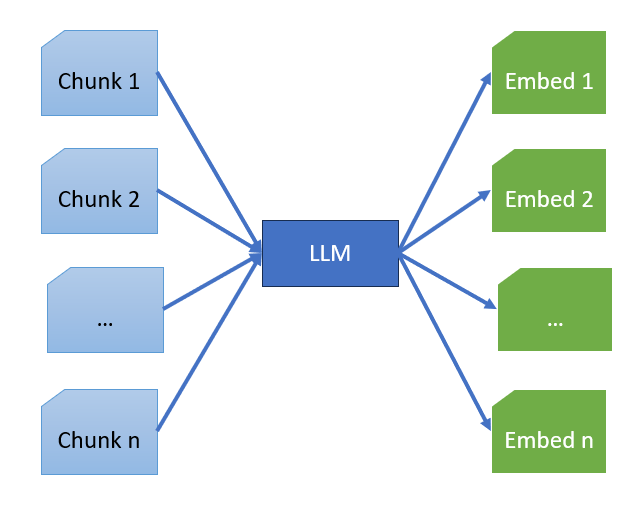

In [3]:
from langchain.document_loaders import WikipediaLoader

query_1 = "Nikola Tesla"
query_2 = "Thomas Edison"

# ==============
docs_1 = WikipediaLoader(query=query_1, load_max_docs=1,
                         doc_content_chars_max=20_000).load()

text_document_1 = docs_1[0].page_content

# ==============
docs_2 = WikipediaLoader(query=query_2, load_max_docs=1,
                         doc_content_chars_max=20_000).load()

text_document_2 = docs_2[0].page_content

In [4]:
documents = [ text_document_1, text_document_2]
metadatas = [ {"document":query_1}, {"document":query_2} ]

In [5]:
from langchain.text_splitter import NLTKTextSplitter
import nltk
nltk.download('punkt')

text_splitter = NLTKTextSplitter(chunk_size=300, chunk_overlap=50)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
tokens_chunks = text_splitter.create_documents(documents, metadatas=metadatas)

In [7]:
len(tokens_chunks)

175

In [8]:
tokens_chunks[5]

Document(page_content='Attempting to develop inventions he could patent and market, Tesla conducted a range of experiments with mechanical oscillators/generators, electrical discharge tubes, and early X-ray imaging.\n\nHe also built a wirelessly controlled boat, one of the first ever exhibited.', metadata={'document': 'Nikola Tesla'})

#### Embeddings | OpenAI

In [ ]:
from langchain.embeddings import OpenAIEmbeddings

from dotenv import dotenv_values
env_values = dotenv_values("./app.env")
openai_api_key = env_values['OPENAI_API_KEY']

embedding_llm = OpenAIEmbeddings(openai_api_key=openai_api_key,
                                 model="text-davinci-003")

In [ ]:
tokens_chunks[5]

Document(page_content='Attempting to develop inventions he could patent and market, Tesla conducted a range of experiments with mechanical oscillators/generators, electrical discharge tubes, and early X-ray imaging.\n\nHe also built a wirelessly controlled boat, one of the first ever exhibited.', metadata={'document': 'Nikola Tesla'})

In [ ]:
# source data
docs_text = [chunk.page_content for chunk in tokens_chunks ]
docs_embeddings = embedding_llm.embed_documents(docs_text)

In [ ]:
# query
query_text = "Can you list a number of Nikola Tesla's inventions?"
query_embedding = embedding_llm.embed_query(query_text)

#### Embeddings | HuggingFace

In [9]:
from langchain.embeddings import SentenceTransformerEmbeddings

model_name = "sentence-transformers/all-MiniLM-L6-v2"

embedding_llm = SentenceTransformerEmbeddings(model_name=model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [10]:
tokens_chunks[5]

Document(page_content='Attempting to develop inventions he could patent and market, Tesla conducted a range of experiments with mechanical oscillators/generators, electrical discharge tubes, and early X-ray imaging.\n\nHe also built a wirelessly controlled boat, one of the first ever exhibited.', metadata={'document': 'Nikola Tesla'})

In [11]:
# source data
docs_text = [ chunk.page_content for chunk in tokens_chunks ]
docs_embeddings = embedding_llm.embed_documents(docs_text)

In [16]:
docs_embeddings[5]

[-0.08436542004346848,
 0.07187116891145706,
 -0.014213072136044502,
 0.031897880136966705,
 -0.08707527071237564,
 -0.05657651275396347,
 -0.026817910373210907,
 0.07040618360042572,
 -0.10560843348503113,
 0.001185638247989118,
 0.04435936361551285,
 0.040072835981845856,
 0.10919047147035599,
 0.0018354221247136593,
 -0.024388229474425316,
 -0.007522819563746452,
 -0.026775537058711052,
 -0.05021093040704727,
 -0.012141302227973938,
 0.005123744253069162,
 0.01049454789608717,
 0.06465385854244232,
 0.06382349878549576,
 -0.0868341252207756,
 0.02575208991765976,
 0.06879547238349915,
 0.0007281353464350104,
 -0.009317183867096901,
 0.05639262869954109,
 -0.0319649800658226,
 0.005513178650289774,
 -0.0011414214968681335,
 -0.04409393295645714,
 -0.0388486385345459,
 0.028580814599990845,
 0.013443673960864544,
 0.03897496312856674,
 0.051476188004016876,
 0.04390297085046768,
 -0.04361751675605774,
 -0.02235022559762001,
 -0.116093210875988,
 -0.031367938965559006,
 0.0042327214032

In [18]:
query_text = "Can you list a number of Nikola Tesla's inventions?"
query_embedding = embedding_llm.embed_query(query_text)
query_embedding

[-0.07105939835309982,
 0.050511881709098816,
 -0.040130093693733215,
 0.024454865604639053,
 -0.055930063128471375,
 0.013734077103435993,
 -0.003047228790819645,
 0.06978421658277512,
 -0.08000953495502472,
 -0.015632789582014084,
 0.061035964637994766,
 0.012470996007323265,
 0.06128022074699402,
 0.04083357751369476,
 -0.07086183875799179,
 0.004202007316052914,
 -0.06086920201778412,
 0.04482870176434517,
 0.013466284610331059,
 -0.023663407191634178,
 -0.007242685649544001,
 0.04129129275679588,
 0.08313377946615219,
 -0.012229026295244694,
 0.053062040358781815,
 0.036540474742650986,
 -0.03242876008152962,
 -0.010277718305587769,
 0.0316704697906971,
 -0.04450386390089989,
 -0.03645835444331169,
 -0.020086053758859634,
 -0.013852233998477459,
 -0.007332292385399342,
 0.013142191804945469,
 -0.020364463329315186,
 0.05078909918665886,
 0.09220388531684875,
 0.031715214252471924,
 -0.006074063014239073,
 0.0036697210744023323,
 -0.11701101809740067,
 0.0032048432622104883,
 -0.00

#### Embeddings | Cohere

In [19]:
cohere_api_key = "Ul29QCdOn3g48pI6nu9KuKDRdFqislKLD2btIyH5"

In [20]:
from langchain.embeddings  import CohereEmbeddings

embedding_llm = CohereEmbeddings(cohere_api_key=cohere_api_key)

In [21]:
tokens_chunks[5]

Document(page_content='Attempting to develop inventions he could patent and market, Tesla conducted a range of experiments with mechanical oscillators/generators, electrical discharge tubes, and early X-ray imaging.\n\nHe also built a wirelessly controlled boat, one of the first ever exhibited.', metadata={'document': 'Nikola Tesla'})

In [22]:
# source data
docs_text = [ chunk.page_content  for chunk in tokens_chunks ]
docs_embeddings = embedding_llm.embed_documents(docs_text)

In [27]:
# query
query_text = "What is the name of Nikola Tesla's mother?"
query_embedding = embedding_llm.embed_query(query_text)
query_embedding

[2.2558594,
 -0.9628906,
 -0.60302734,
 -0.61328125,
 -1.6025391,
 -0.042938232,
 -0.40551758,
 0.47094727,
 -0.7128906,
 1.9375,
 0.48608398,
 -0.008903503,
 0.74658203,
 0.62353516,
 -0.98779297,
 -0.64746094,
 -0.73583984,
 0.45703125,
 0.3955078,
 0.69970703,
 -1.90625,
 -0.3256836,
 -0.8408203,
 0.6958008,
 1.4746094,
 2.265625,
 -0.6064453,
 2.3808594,
 -1.4990234,
 0.9199219,
 -0.33496094,
 -0.5019531,
 -0.27563477,
 -0.07318115,
 1.4775391,
 -1.3535156,
 -0.14978027,
 -0.6816406,
 0.5942383,
 0.4494629,
 1.3720703,
 0.062805176,
 -1.0146484,
 -1.0332031,
 -0.6376953,
 0.87841797,
 -1.2255859,
 -0.7705078,
 1.0742188,
 -0.7714844,
 -0.29858398,
 -1.8320312,
 -2.1113281,
 0.3557129,
 -1.3134766,
 -0.4951172,
 -2.3105469,
 -0.28222656,
 0.22937012,
 1.3710938,
 -2.0058594,
 2.6425781,
 2.578125,
 0.37963867,
 -0.07702637,
 -0.96533203,
 -2.0371094,
 -1.3466797,
 -0.12054443,
 0.1796875,
 0.44677734,
 -1.3818359,
 0.8408203,
 -0.6669922,
 -0.6196289,
 -0.053222656,
 -1.3623047,
 0.

## Vectors Stores

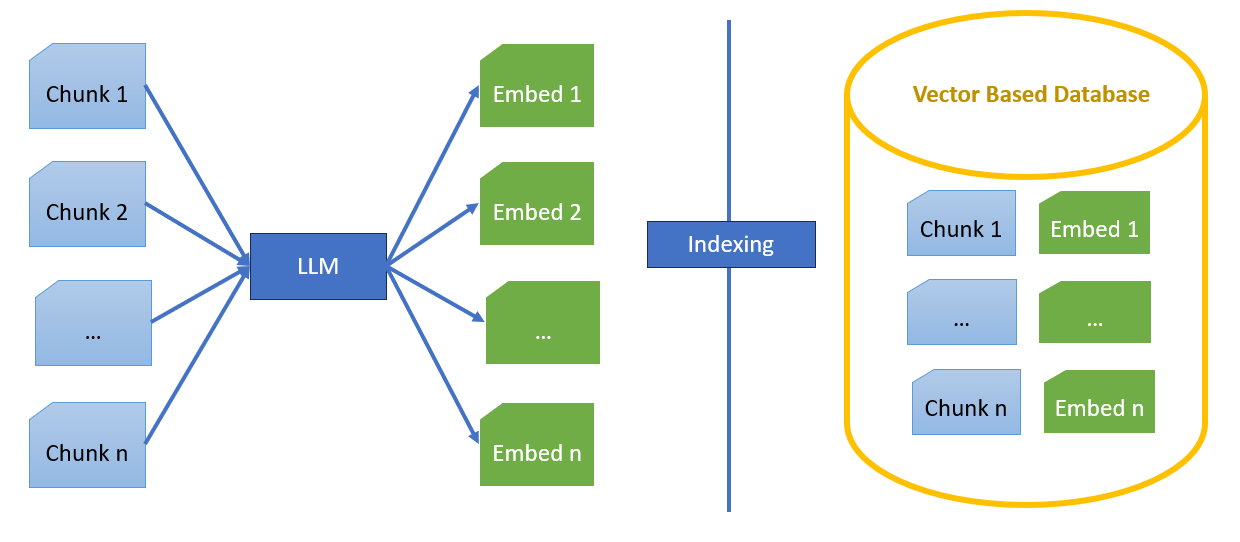

In [29]:
from langchain.document_loaders import WikipediaLoader

from langchain.text_splitter import NLTKTextSplitter
import nltk
nltk.download('punkt')

from langchain.embeddings import CohereEmbeddings

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
# load document
query = "Nikola Tesla"

docs = WikipediaLoader(query=query,
                       load_max_docs=1,
                       doc_content_chars_max=20_000).load()

In [31]:
document_1 = docs[0].page_content

In [32]:
text_splitter = NLTKTextSplitter(chunk_size=300, chunk_overlap=50)

tokens_chunks = text_splitter.create_documents(
                                               [document_1],
                                               metadatas=[{"document":query}]
                                               )

In [33]:
embedding_llm = CohereEmbeddings(cohere_api_key=cohere_api_key)

In [ ]:
#embedding_llm = OpenAIEmbeddings(openai_api_key=openai_api_key, model="gpt-3.5-turbo")

#### Vector Stores | FAISS

In [34]:
from langchain.vectorstores import FAISS

vector_db = FAISS.from_documents(tokens_chunks, embedding_llm)

In [37]:
query_text = "In which year did Tesla's fathre die?"

similar_docs = vector_db.similarity_search(query_text)
len(similar_docs)

4

In [39]:
similar_docs[1]

Document(page_content="Tesla's father died the next month, on 17 April 1879, at the age of 60 after an unspecified illness.\n\nDuring the rest of the year Tesla taught a large class of students in his old school in Gospić.", metadata={'document': 'Nikola Tesla'})

#### Vector Stores | Chroma

In [40]:
from langchain.vectorstores import Chroma

# store text documents as vectors
save_to_dir = "/content/wiki_chroma_db"
#pour les id
docs_ids = list(range( len(tokens_chunks) ) )
docs_ids = [ str(d) for d in docs_ids ]

vector_db = Chroma.from_documents(
                                tokens_chunks,
                                embedding_llm,
                                persist_directory=save_to_dir,
                                ids=docs_ids
                            )

In [41]:
# search for most similar document to a query
query_text = "In which year did Tesla's fathre die?"

similar_docs = vector_db.similarity_search(
                                      query_text,
                                      k=5,
                                      filter={'document': 'Nikola Tesla'}
                                    )

In [42]:
len(similar_docs)

5

In [43]:
similar_docs[0]

Document(page_content="He died in New York City in January 1943.\n\nTesla's work fell into relative obscurity following his death, until 1960, when the General Conference on Weights and Measures named the International System of Units (SI) measurement of magnetic flux density the tesla in his honor.", metadata={'document': 'Nikola Tesla'})

In [44]:
## save to disk
vector_db.persist()

In [47]:
## Load from disk
load_from_dir = "/content/wiki_chroma_db"

loaded_vector_db = Chroma(
    persist_directory=load_from_dir,
    embedding_function=embedding_llm
)

In [48]:
# search for most similar document to a query
query_text = "In which year did Tesla's fathre die?"

similar_docs = loaded_vector_db.similarity_search(
                                      query_text,
                                      k=5,
                                      filter={'document': 'Nikola Tesla'}
                                    )

In [49]:
print( similar_docs[0] )

page_content="He died in New York City in January 1943.\n\nTesla's work fell into relative obscurity following his death, until 1960, when the General Conference on Weights and Measures named the International System of Units (SI) measurement of magnetic flux density the tesla in his honor." metadata={'document': 'Nikola Tesla'}


## QnA Chain

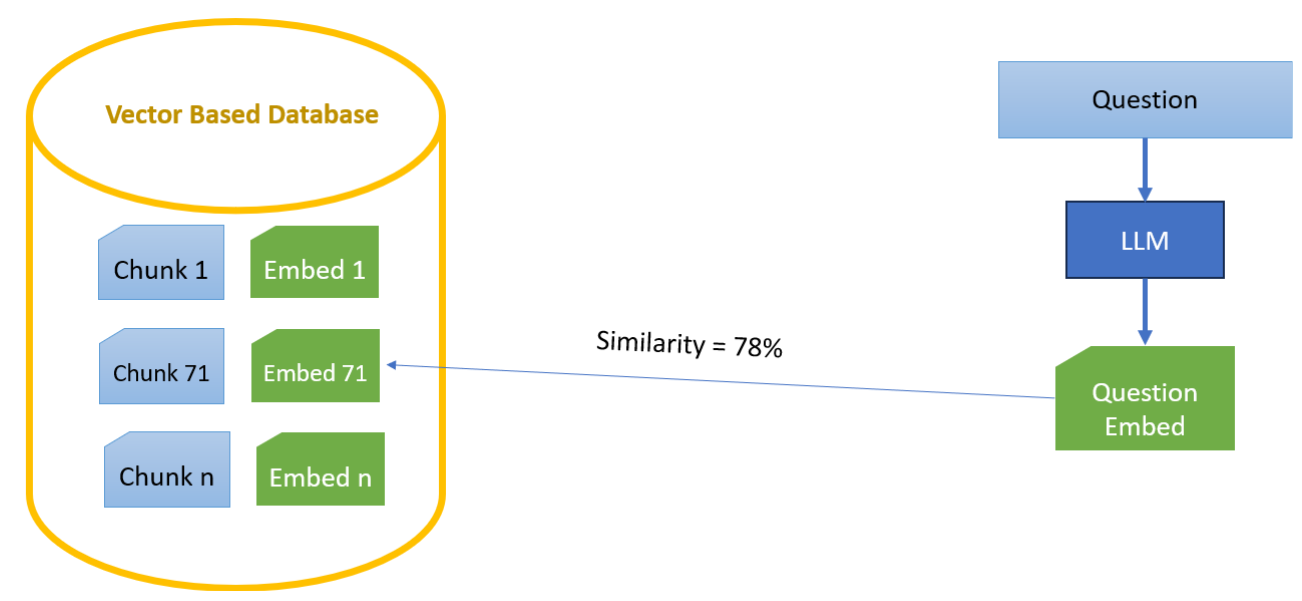

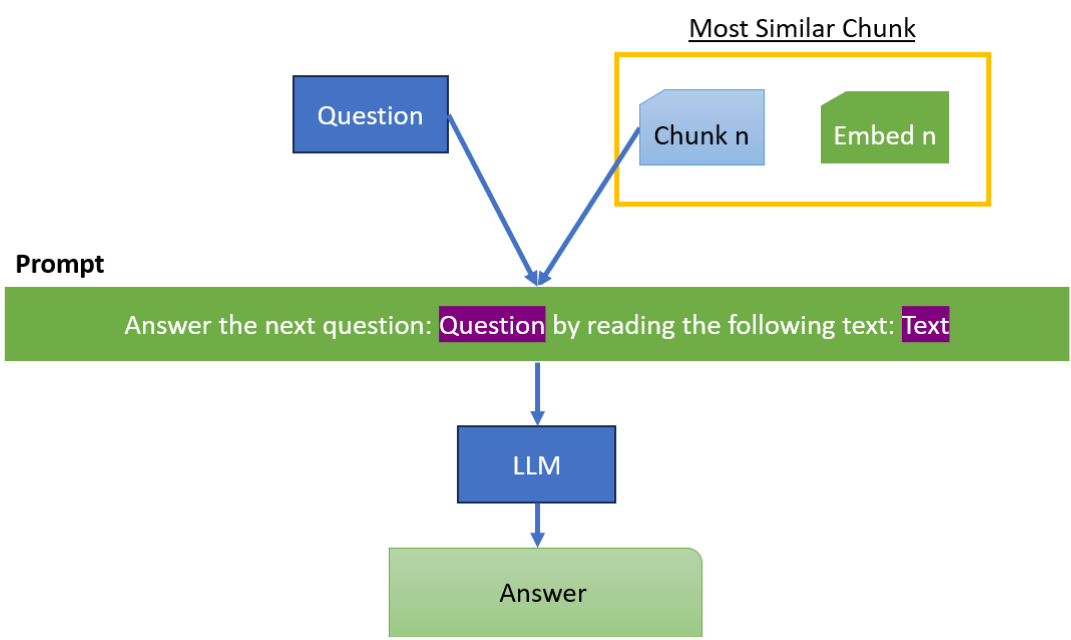


In [50]:
from langchain.document_loaders import WikipediaLoader
from langchain.text_splitter import NLTKTextSplitter
import nltk
nltk.download('punkt')

from langchain.embeddings import CohereEmbeddings
from langchain.vectorstores import Chroma

#from dotenv import dotenv_values
#env_values = dotenv_values("./app.env")
#openai_api_key = env_values['OPENAI_API_KEY']

# load document
query = "Nikola Tesla"

docs = WikipediaLoader(query=query,
                       load_max_docs=1,
                       doc_content_chars_max=20_000).load()

documents = [ docs[0].page_content ]
metadatas = [ {"document": query} ]

# splitter
text_splitter = NLTKTextSplitter(chunk_size=300, chunk_overlap=50)
tokens_chunks = text_splitter.create_documents(
    documents,
    metadatas=metadatas
)

# embeddings
embedding_llm = CohereEmbeddings(cohere_api_key=cohere_api_key)
#embedding_llm = CohereEmbeddings(openai_api_key=openai_api_key)

# vector database
save_to_dir = "/content/wiki_chroma_db"
vector_db = Chroma.from_documents(
    tokens_chunks,
    embedding_llm,
    persist_directory=save_to_dir
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### QnA Chain | Stuff

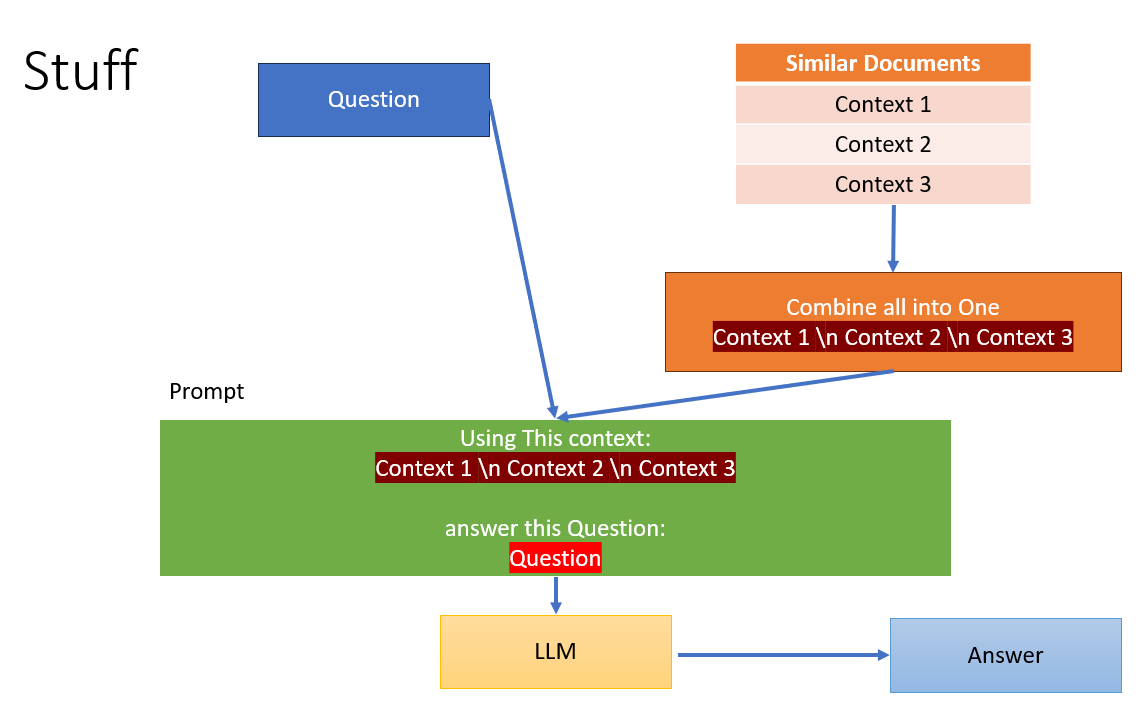

# MODEL FROM HUGGINFACE

In [ ]:
!pip install

In [51]:
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
#from langchain.llms import OpenAI
#from dotenv import dotenv_values

In [56]:
env_values = dotenv_values("./app.env")
openai_api_key = env_values['OPENAI_API_KEY']

llm = OpenAI(openai_api_key=openai_api_key,
             model_name="gpt-3.5-turbo",
             temperature=0.5)

/usr/local/lib/python3.10/dist-packages/langchain/llms/openai.py:189: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/langchain/llms/openai.py:769: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(


In [57]:
qna_template = "\n".join([
    "Answer the next questionu using the provided context.",
    "If the answer is not contained in the context, say 'NO ANSWER IS AVAILABLE'",
    "### Context:",
    "{context}",
    "",
    "### Question:",
    "{question}",
    "",
    "### Answer:",
])

qna_prompt = PromptTemplate(
    template=qna_template,
    input_variables=['context', 'question'],
    verbose=True
)

stuff_chain = load_qa_chain(llm, chain_type="stuff", prompt=qna_prompt)

In [58]:
question = "Why did Tesla work as a football player?"

similar_docs = vector_db.similarity_search(question, k=4)

print(len(similar_docs))

4


In [59]:
answer = stuff_chain(
    {
        "input_documents": similar_docs,
        "question": question
    },
    return_only_outputs=True,
)

answer

RateLimitError: You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.

#### QnA Chains | MapReduce

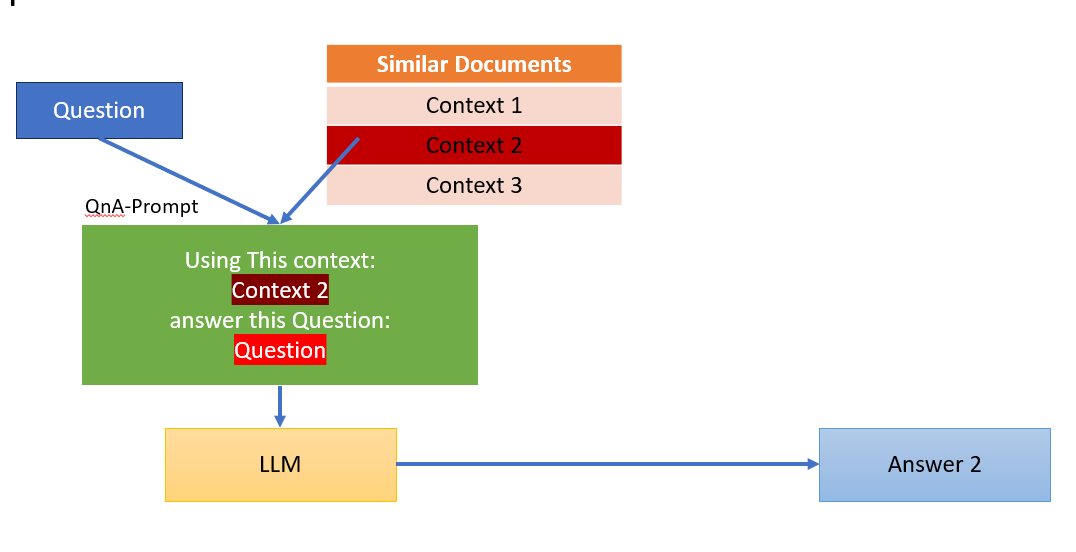

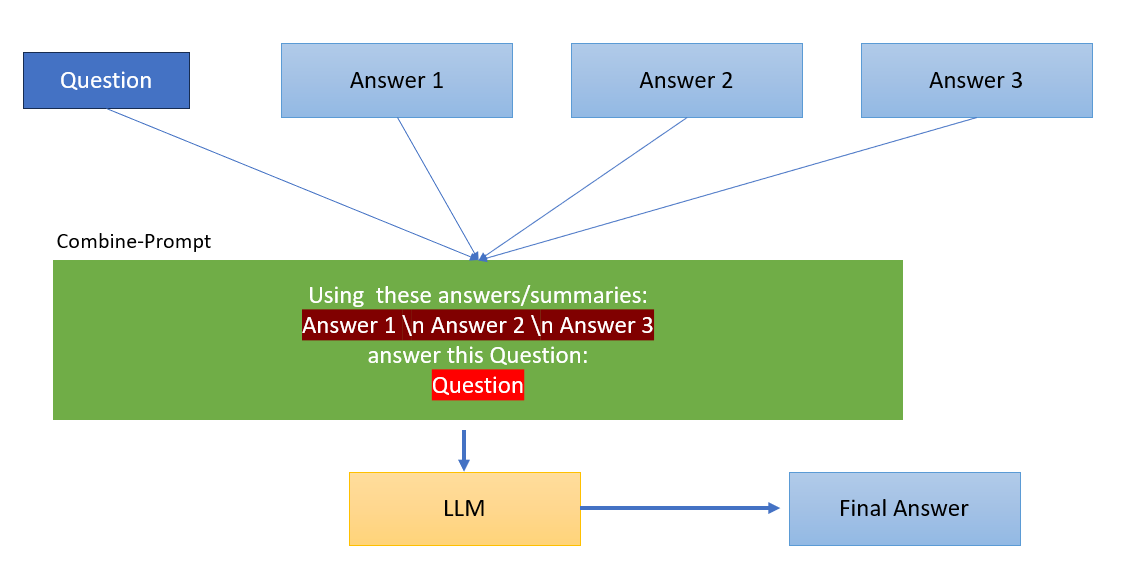

In [ ]:
from langchain.llms import OpenAI
from dotenv import dotenv_values

from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain

In [ ]:
env_values = dotenv_values("./app.env")
openai_api_key = env_values['OPENAI_API_KEY']

llm = OpenAI(openai_api_key=openai_api_key,
             model_name="text-davinci-003",
             temperature=0.5)

In [ ]:
qna_template = "\n".join([
    "Answer the next question using the provided context.",
    "If the answer is not contained in the context, say 'NO ANSWER IS AVAILABLE'",
    "### Context:",
    "{context}",
    "",
    "### Question:",
    "{question}",
    "",
    "### Answer:",
])

qna_prompt = PromptTemplate(
    template=qna_template,
    input_variables=['context', 'question'],
)

In [ ]:
combine_template = "\n".join([
    "Given intermediate contexts for a question, generate a final answer.",
    "If the answer is not contained in the intermediate contexts, say 'NO ANSWER IS AVAILABLE'",
    "### Summaries:",
    "{summaries}",
    "",
    "### Question:",
    "{question}",
    "",
    "### Final Answer:",
])

combine_prompt = PromptTemplate(
    template=combine_template,
    input_variables=['summaries', 'question'],
)

In [ ]:
map_reduce_chain = load_qa_chain(llm, chain_type="map_reduce",
                                 return_intermediate_steps=True,
                                 question_prompt=qna_prompt,
                                 combine_prompt=combine_prompt)

In [ ]:
question = "What did Tesla invent?"

similar_docs = vector_db.similarity_search(question, k=5)

print( len(similar_docs) )

5


In [ ]:
final_answer = map_reduce_chain({
    "input_documents": similar_docs,
    "question": question
}, return_only_outputs=True)

In [ ]:
final_answer

{'intermediate_steps': ['\nTesla invented mechanical oscillators/generators, electrical discharge tubes, early X-ray imaging, and a wirelessly controlled boat.',
  '\nTesla invented an induction motor that ran on alternating current (AC).',
  '\nWireless lighting and worldwide wireless electric power distribution.',
  '\nTesla invented the modern alternating current (AC) electricity supply system.',
  '\nA thermo-magnetic motor.'],
 'output_text': '\nTesla invented mechanical oscillators/generators, electrical discharge tubes, early X-ray imaging, a wirelessly controlled boat, an induction motor that ran on alternating current (AC), wireless lighting, worldwide wireless electric power distribution, and a thermo-magnetic motor.'}

#### QnA Chain | Refine

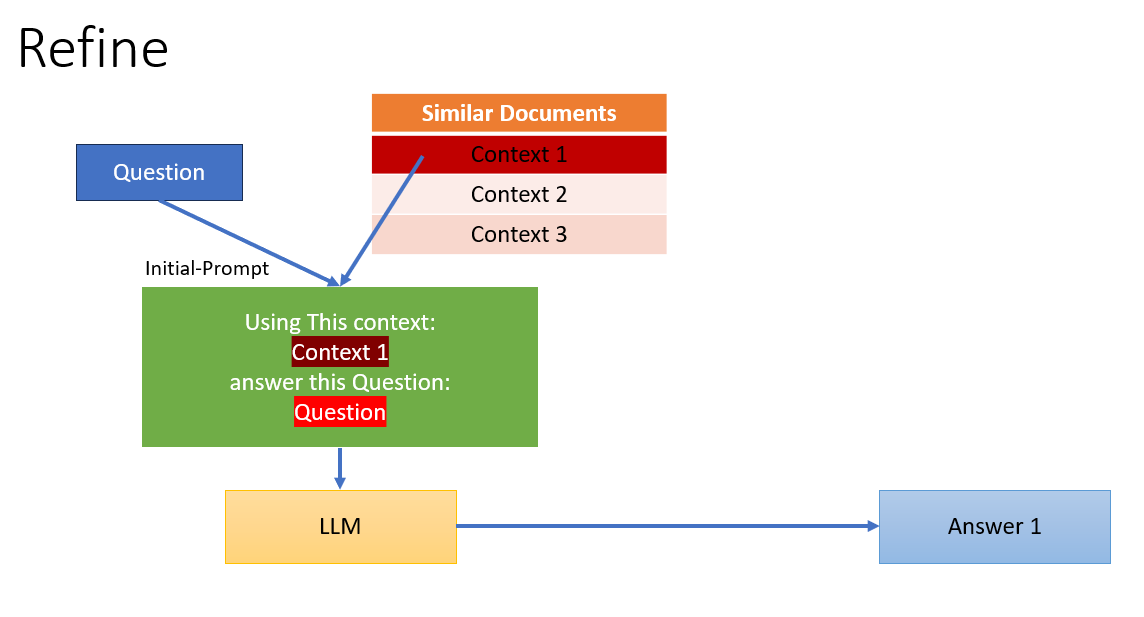

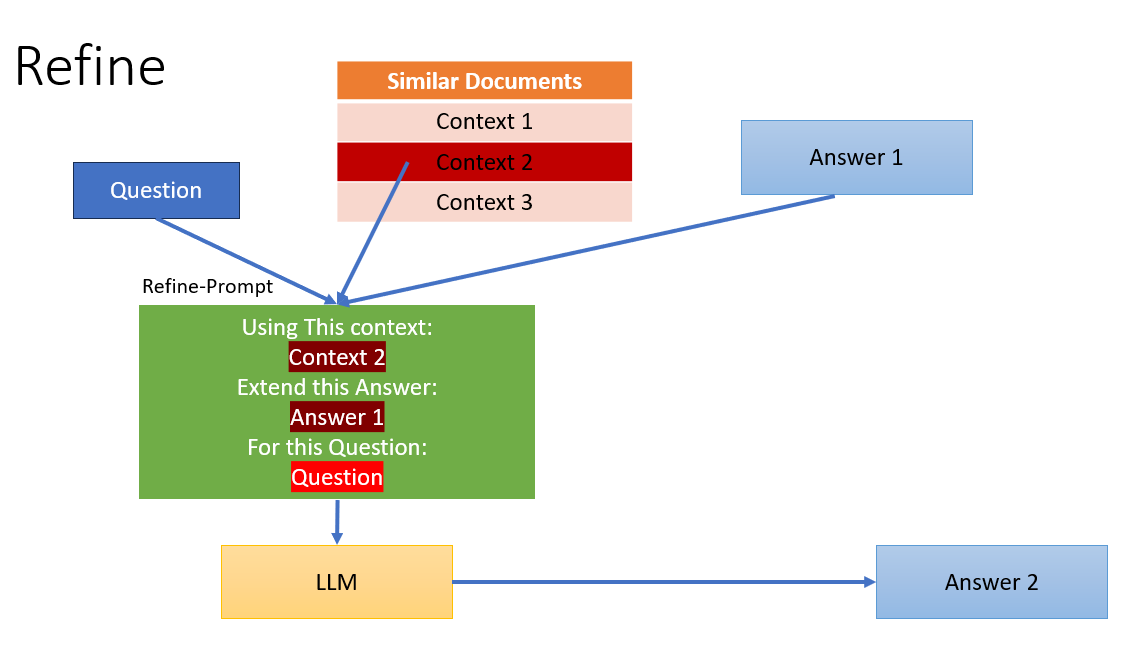

In [ ]:
from langchain.llms import OpenAI
from dotenv import dotenv_values
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain

In [ ]:
env_values = dotenv_values("./app.env")
openai_api_key = env_values['OPENAI_API_KEY']

llm = OpenAI(openai_api_key=openai_api_key,
             model_name="gpt-3.5-turbo-0613",
             temperature=0.5)

In [ ]:
initial_qna_template = "\n".join([
    "Answer the following question using the provided text only.",
    "If answer is not available. Say 'No answer for this context'",
    "### Context:",
    "{context_str}",
    "",
    "### Question:",
    "{question}",
    "### Answer:",
])

initial_qna_prompt = PromptTemplate(
    template=initial_qna_template,
    input_variables=['context_str', 'question']
)

In [ ]:
refine_qna_template = "\n".join([
    "Refine the existing answer, if required, with the following context.",
    "If answer is not available. Say 'No answer for this context'",
    "### Context",
    "{context_str}",
    "",
    "### Existing Answer:",
    "{existing_answer}",
    "",
    "### Question:",
    "{question}",
    "",
    "### Refined Answer:",
])

refine_qna_prompt = PromptTemplate(
    template=refine_qna_template,
    input_variables=['context_str', 'existing_answer', 'question']
)

In [ ]:
refine_chain = load_qa_chain(
    llm,
    chain_type="refine",
    question_prompt=initial_qna_prompt,
    refine_prompt=refine_qna_prompt,
    return_intermediate_steps=True,
)

In [ ]:
question = "What did Tesla invent?"

similar_docs = vector_db.similarity_search(question, k=2)

print( len(similar_docs) )

In [ ]:
final_refined_answer = refine_chain({
                                        "input_documents": similar_docs,
                                        "question": question
                                    }, return_only_outputs=True)

final_refined_answer

{'intermediate_steps': ['Tesla invented mechanical oscillators/generators, electrical discharge tubes, early X-ray imaging, and a wirelessly controlled boat.',
  'Tesla invented mechanical oscillators/generators, electrical discharge tubes, early X-ray imaging, and a wirelessly controlled boat. Additionally, in 1887, Tesla developed an induction motor that ran on alternating current (AC), a power system format that was rapidly expanding in Europe and the United States because of its advantages in long-distance, high-voltage transmission.'],
 'output_text': 'Tesla invented mechanical oscillators/generators, electrical discharge tubes, early X-ray imaging, and a wirelessly controlled boat. Additionally, in 1887, Tesla developed an induction motor that ran on alternating current (AC), a power system format that was rapidly expanding in Europe and the United States because of its advantages in long-distance, high-voltage transmission.'}